In [146]:
# Nescessary imports

%matplotlib inline

# supress warnings
import warnings
warnings.filterwarnings('ignore')

import os

# import libraries
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set random seed
random.seed(42)

In [147]:
import sys
if 'data_wraper' in sys.modules: del sys.modules['data_wraper']
from data_wraper import *

In [148]:
data_dir = os.path.join(os.getcwd(), 'data')
paths = {
    'FOVfiting2' : os.path.join(data_dir, 'mapsCeline_FOVfitting_2_pol-60.mat'),
    '3quadrants2' : os.path.join(data_dir, 'mapsCeline_3quadrants_2_pol-60.mat'),
    'FOVfiting3' : os.path.join(data_dir, 'mapsCeline_FOVfitting_3_pol-60.mat'),
    '3quadrants3' : os.path.join(data_dir, 'mapsCeline_3quadrants_3_pol-60.mat'),
    'FOVfiting4' : os.path.join(data_dir, 'mapsCeline_FOVfitting_4_pol-60.mat'),
    '3quadrants4' : os.path.join(data_dir, 'mapsCeline_3quadrants_4_pol-60.mat'),
    'FOVfiting5' : os.path.join(data_dir, 'mapsCeline_FOVfitting_5_pol-60.mat'),
    '3quadrants5' : os.path.join(data_dir, 'mapsCeline_3quadrants_5_pol-60.mat'),
    'FOVfiting6' : os.path.join(data_dir, 'mapsCeline_FOVfitting_6_pol-60.mat'),
    '3quadrants6' : os.path.join(data_dir, 'mapsCeline_3quadrants_6_pol-60.mat'),   
    'FOVfiting9' : os.path.join(data_dir, 'mapsCeline_FOVfitting_9_pol-60.mat'),
    '3quadrants9' : os.path.join(data_dir, 'mapsCeline_3quadrants_9_pol-60.mat'),
    'FOVfiting9a' : os.path.join(data_dir, 'mapsCeline_FOVfitting_9a_polNP.mat'),
    '3quadrants9a' : os.path.join(data_dir, 'mapsCeline_3quadrants_9a_polNP.mat')
}

In [149]:
calibration_maps = [paths['FOVfiting2'], paths['3quadrants2']] #, paths['FOVfiting3'], paths['3quadrants3']]
dataset = Dataset(calibration_maps)

In [150]:
dataset.preprocess_data()

In [151]:
dataset.crop_data(100)

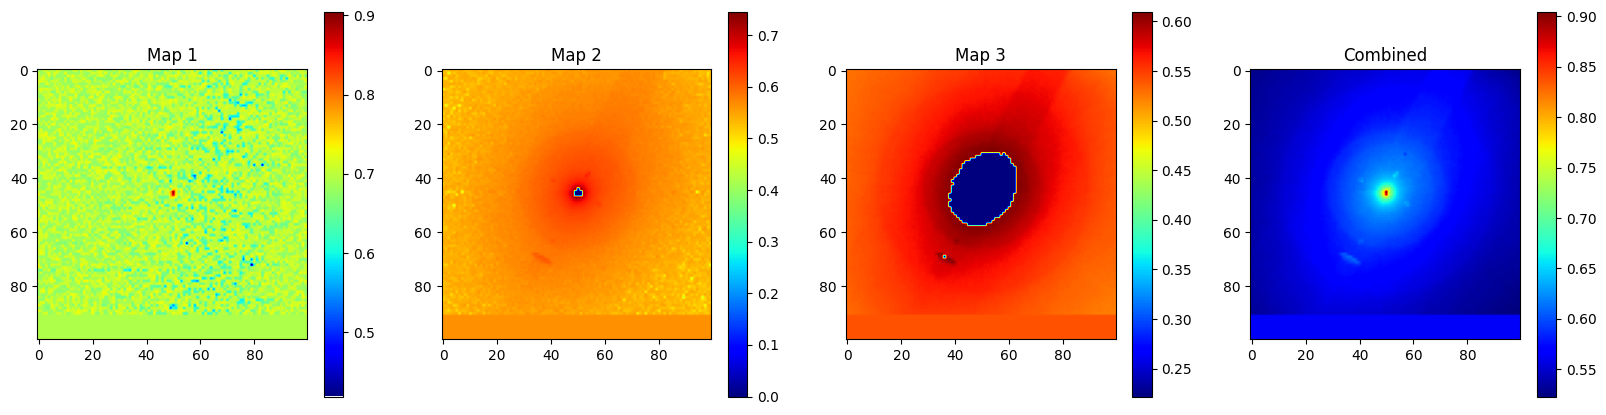

In [152]:
ind = 654 #random.randint(0, len(dataset.map1_list)-1) #125

# plot the maps
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs[0].imshow(dataset.map1_list[ind], cmap='jet')
plt.colorbar(axs[0].imshow(dataset.map1_list[ind], cmap='jet'), ax=axs[0])
axs[0].set_title('Map 1')

axs[1].imshow(dataset.map2_list[ind], cmap='jet')
plt.colorbar(axs[1].imshow(dataset.map2_list[ind], cmap='jet'), ax=axs[1])
axs[1].set_title('Map 2')

axs[2].imshow(dataset.map3_list[ind], cmap='jet')
plt.colorbar(axs[2].imshow(dataset.map3_list[ind], cmap='jet'), ax=axs[2])
axs[2].set_title('Map 3')

axs[3].imshow(dataset.combined_list[ind], cmap='jet')
plt.colorbar(axs[3].imshow(dataset.combined_list[ind], cmap='jet'), ax=axs[3])
axs[3].set_title('Combined')

plt.show()

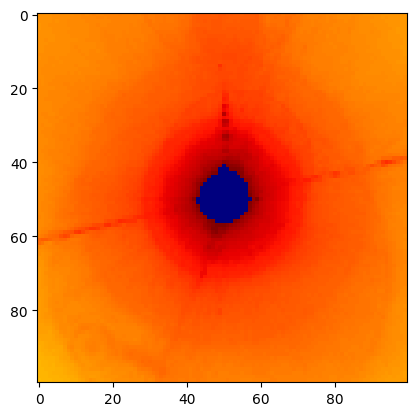

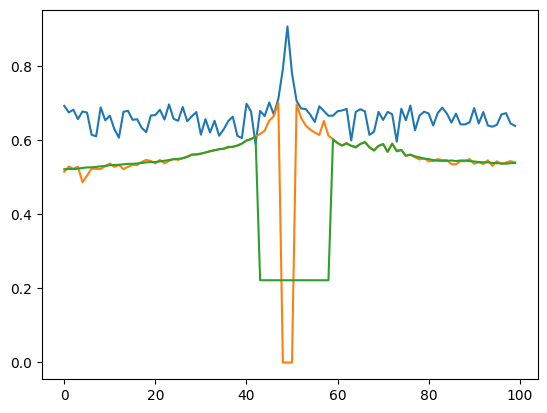

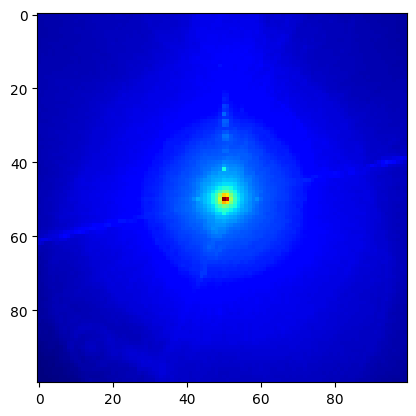

In [153]:
dataset.plot_map(0,3)
dataset.plot_radial_profile(0,[1,2,3])
dataset.plot_combined(0)